original code found on https://pypi.org/project/drawSvg/

new code specific for our usecase

In [30]:
import drawSvg as draw
from drawSvg.widgets import DrawingWidget
from hyperbolic.poincare.shapes import *
from constructions import shift

delta=0.3
click_list=[]
lineStyle2 = dict(stroke_width=0.01, stroke='white', fill='none' #,stroke_dasharray='.02,.02'
                 )

# Create drawing
d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))
g=draw.Group()
d.append(g)


def draw_delta_neigbourhood_twosides(points,delta):
    for i,x in enumerate(points):
        p1=Point.fromEuclid(x[0],x[1])
        g.draw(Circle.fromCenterRadius(p1, delta), fill='green',fill_opacity=1)
        for y in points[i+1:]:
            if i==0:
                p2=Point.fromEuclid(y[0],y[1])
                line = Line.fromPoints(*p1, *p2, segment=True)
                g.draw(line, hwidth=2*delta, fill='green',fill_opacity=1)
                
def draw_thin_triangle(points):
    for i,x in enumerate(points):
        for y in points[i+1:]:
            p1=Point.fromEuclid(x[0],x[1])
            p2=Point.fromEuclid(y[0],y[1])
            line=Line.fromPoints(*p1,*p2,segment=True)
            g.draw(line, **lineStyle2)

def draw_thick_line(points):
    for i,x in enumerate(points):
        for y in points[i+1:]:
            p1=Point.fromEuclid(x[0],x[1])
            p2=Point.fromEuclid(y[0],y[1])
            line=Line.fromPoints(*p1,*p2,segment=True)
            g.draw(line, hwidth=0.4,fill='red')
    
def redraw_Mousepoint(points):
    for i,x in enumerate(points):
        p=Point.fromEuclid(x[0],x[1])
        g.draw(Circle.fromCenterRadius(p,0.02),fill='white')
        


clicks=0
        
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
        global clicks
        clicks+=1
        if (x**2 + y**2) ** 0.5 + 2e-10 < 1:
            if clicks<3:
                click_list.append((x, y))
            elif clicks==3:
                click_list.append((x,y))
                g.children.clear()
                draw_delta_neigbourhood_twosides(click_list,delta)
                draw_thin_triangle(click_list)
            else:
                g.children.clear()
                draw_delta_neigbourhood_twosides(shift(click_list,clicks),delta)
                draw_thin_triangle(shift(click_list,clicks))
        widget.refresh()
        
        
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 2e-10 < 1:
        if len(click_list)<3:
            g.children.clear()
            draw_thin_triangle(click_list + [(x, y)])
            redraw_Mousepoint([(x,y)])
    widget.refresh()
    
draw_thick_line([(0.5,0.4),(-0.2,-0.3)])
widget


DrawingWidget()

C:\ProgramData\Anaconda3\lib\site-packages\drawSvg\raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e
  warnings.warn(msg, RuntimeWarning)


False


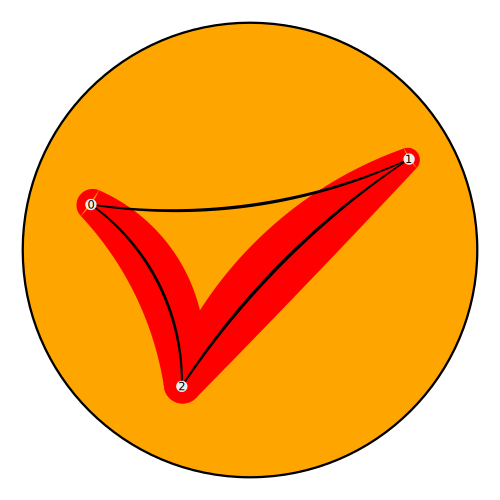

In [1]:
import drawSvg as draw
from constructions import deltaLines_of_Line, shift
from deltaNeigbourhood import makeRoundCap
from hyperbolic.poincare.shapes import *
from Triangle import Triangle

delta=0.3

d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

p1=Point.fromEuclid(-0.7,0.2)
p2=Point.fromEuclid(0.7,0.4)
p3=Point.fromEuclid(-0.3,-0.6)
PList=[p1,p2,p3]
#print(PList)

IdealPoints=[Ideal.fromDegree(i/3*360) for i in range(2)]

lineStyle1 = dict(fill='red', fill_opacity=1)

def deltaNeigbourhood(triangle, delta, edgenumber=0):
    for i,l in enumerate(triangle.edges):
        if i==edgenumber:
            continue
        else:
            d.draw(makeRoundCap(l, triangle.vertices[i], delta), **lineStyle1)
            d.draw(makeRoundCap(l, triangle.vertices[(i+1)%len(triangle.vertices)], delta), **lineStyle1)
            d.draw(l, hwidth=2*delta, **lineStyle1)

Tri=Triangle.fromVertices(PList)
PList=Tri.vertices
SList=Tri.edges

Tri2=Triangle.fromVertices(IdealPoints)
"""
for p,l in zip(PList, SList):
    d.draw(l.makePerpendicular(*p), hwidth=0.03)
    cap = makeRoundCap(l, p,delta)
    d.draw(l, hwidth=2*delta, fill='blue')
    d.draw(cap, hwidth=0.03, fill='blue')

d.draw(deltaTri, stroke_width=0.02, stroke='black', fill='none')

for l in SList:
    d.draw(l, hwidth=0.03)
    d.draw(l.makeOffset(delta),hwidth=0.03, fill='green')
    d.draw(l.makeOffset(-delta),hwidth=0.03, fill='red')


for i,l in enumerate(SList):
    RestList = SList[:i] + SList[i+1:]
    for j,y in enumerate(RestList):
        for h in deltaLines_of_Line(l,delta):
            ips = y.intersectionsWithHcycle(h)
            for p in ips:
                d.draw(p, hradius=0.15, hwidth=0.02, fill='white', opacity=0.6)
                if is_on_Linesegment(*p, y):
                    d.draw(p, radius=0.01, fill='yellow')

for i,v in enumerate(PList):
    d.draw(v, radius=0.025, fill='#eee')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))
"""
deltaNeigbourhood(Tri, delta)

for l in Tri.edges:
    d.draw(l, hwidth=0.03)

for i,v in enumerate(Tri.vertices):
    d.draw(v, radius=0.025, fill='#eee')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))



print(Tri.isCovered(delta))
d

[Ideal(1.0, 0.0), Ideal(-0.5, 0.866), Ideal(-0.5, -0.866)]


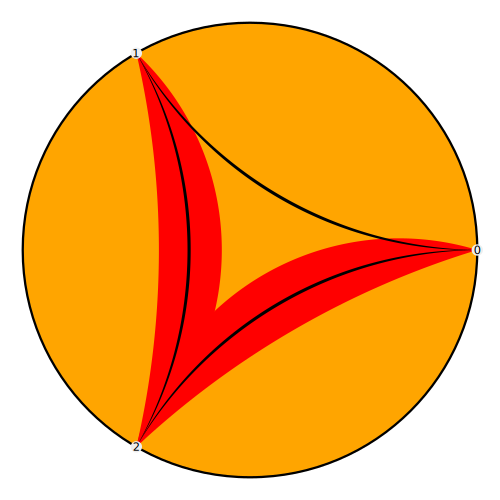

In [9]:
import drawSvg as draw
from constructions import deltaLines_of_Line, shift
from deltaNeigbourhood import makeRoundCap
from hyperbolic.poincare.shapes import *
from Triangle import Triangle

delta=0.3

d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

IdealPoints=[Ideal.fromDegree(i/3*360) for i in range(3)]
print(IdealPoints)
lineStyle1 = dict(fill='red', fill_opacity=1)

def deltaNeigbourhood(triangle, delta, edgenumber=0):
    for i,l in enumerate(triangle.edges):
        if i==edgenumber:
            continue
        else:
            d.draw(makeRoundCap(l, triangle.vertices[i], delta), **lineStyle1)
            d.draw(makeRoundCap(l, triangle.vertices[(i+1)%len(triangle.vertices)], delta), **lineStyle1)
            d.draw(l, hwidth=2*delta, **lineStyle1)

Tri2=Triangle.fromVertices(IdealPoints)

deltaNeigbourhood(Tri2, delta)

for l in Tri2.edges:
    d.draw(l, hwidth=0.03)

for i,v in enumerate(Tri2.vertices):
    d.draw(v, radius=0.025, fill='#eee')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))



#print(Tri2.isCovered(delta))
d